In [1]:
# Installing pyspark on local machine
!pip install pyspark 

In [2]:
# Importing installed pyspark
import pyspark

In [3]:
# Importing PySpark Session 
from pyspark.sql import SparkSession

In [4]:
# Creating Spark and setting a name for the application
spark=SparkSession.builder.appName('Project').getOrCreate()

In [5]:
spark

In [6]:
# Reading csv file using spark
music = spark.read.csv('Desktop\Project\spotify.csv')

In [7]:
# Displaying the dataset
music.show()

+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|     _c0|                 _c1|                 _c2|                 _c3|                 _c4|       _c5|        _c6|     _c7|         _c8|   _c9|_c10|    _c11|_c12|       _c13|        _c14|            _c15|    _c16|   _c17|   _c18|          _c19|       _c20|                _c21|
+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|index_id|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy| key|loudne

In [8]:
# Replacing Column number with header name 
music=spark.read.option('header','true').csv('Desktop\Project\spotify.csv')

In [9]:
music

DataFrame[index_id: string, track_id: string, artists: string, album_name: string, track_name: string, popularity: string, duration_ms: string, explicit: string, danceability: string, energy: string, key: string, loudness: string, mode: string, speechiness: string, acousticness: string, instrumentalness: string, liveness: string, valence: string, tempo: string, time_signature: string, track_genre: string, spotify_release_date: string]

In [10]:
# Displaying the edited file
music.show()

+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|index_id|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|spotify_release_date|
+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|       0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   FALSE|       0.676| 0.461|  1|  -6.746| 

In [11]:
# Check the schema of the dataset
music.printSchema()

root
 |-- index_id: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- album_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- explicit: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- track_genre: string (nullable = true)
 |-- spotify_release_date: string (nullable = true)



In [12]:
# Changing the datatype of the columns
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import BooleanType
from pyspark.sql.types import DateType

music = music.withColumn("popularity",music["popularity"].cast(IntegerType()))
music = music.withColumn("duration_ms",music["duration_ms"].cast(DoubleType()))
music = music.withColumn("explicit",music["explicit"].cast(BooleanType()))
music = music.withColumn("danceability",music["danceability"].cast(DoubleType()))
music = music.withColumn("energy",music["energy"].cast(DoubleType()))
music = music.withColumn("key",music["key"].cast(IntegerType()))
music = music.withColumn("loudness",music["loudness"].cast(DoubleType()))
music = music.withColumn("mode",music["mode"].cast(BooleanType()))
music = music.withColumn("speechiness",music["speechiness"].cast(DoubleType()))
music = music.withColumn("acousticness",music["acousticness"].cast(DoubleType()))
music = music.withColumn("instrumentalness",music["instrumentalness"].cast(DoubleType()))
music = music.withColumn("liveness",music["liveness"].cast(DoubleType()))
music = music.withColumn("valence",music["valence"].cast(DoubleType()))
music = music.withColumn("spotify_release_date",music["spotify_release_date"].cast(DateType()))

In [13]:
music.printSchema()

root
 |-- index_id: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- album_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: boolean (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- track_genre: string (nullable = true)
 |-- spotify_release_date: date (nullable = true)



In [14]:
# single column display
music.select('artists').show()

+--------------------+
|             artists|
+--------------------+
|         Gen Hoshino|
|        Ben Woodward|
|Ingrid Michaelson...|
|        Kina Grannis|
|    Chord Overstreet|
|        Tyrone Wells|
|A Great Big World...|
|          Jason Mraz|
|Jason Mraz;Colbie...|
|      Ross Copperman|
|        Zack Tabudlo|
|          Jason Mraz|
|            Dan Berk|
|       Anna Hamilton|
|Chord Overstreet;...|
|         Landon Pigg|
|Andrew Foy;Renee Foy|
|Andrew Foy;Renee Foy|
|Jason Mraz;Colbie...|
|Boyce Avenue;Bea ...|
+--------------------+
only showing top 20 rows



In [15]:
# display multiple column
music.select(['artists','track_name']).show()

+--------------------+--------------------+
|             artists|          track_name|
+--------------------+--------------------+
|         Gen Hoshino|              Comedy|
|        Ben Woodward|    Ghost - Acoustic|
|Ingrid Michaelson...|      To Begin Again|
|        Kina Grannis|Can't Help Fallin...|
|    Chord Overstreet|             Hold On|
|        Tyrone Wells|Days I Will Remember|
|A Great Big World...|       Say Something|
|          Jason Mraz|           I'm Yours|
|Jason Mraz;Colbie...|               Lucky|
|      Ross Copperman|              Hunger|
|        Zack Tabudlo|Give Me Your Forever|
|          Jason Mraz|     I Won't Give Up|
|            Dan Berk|                Solo|
|       Anna Hamilton|            Bad Liar|
|Chord Overstreet;...|     Hold On - Remix|
|         Landon Pigg|Falling in Love a...|
|Andrew Foy;Renee Foy|ily (i love you b...|
|Andrew Foy;Renee Foy|         At My Worst|
|Jason Mraz;Colbie...|               Lucky|
|Boyce Avenue;Bea ...|          

In [16]:
# Deleting null values
music.na.drop(how='any').count()

113865

Total 135 rows with any null value are deleted

In [17]:
music.show()

+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+-----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|index_id|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness| mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|spotify_release_date|
+--------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+-----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+--------------------+
|       0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|   230666.0|   false|       0.676| 0.461|  1|  -6.74

In [18]:
# outlier detection

In [29]:
import pandas as pd

df = pd.read_csv(r'C:\Users\AJINKYA\Desktop\Project\spotify.csv')

print(df) 

        index_id                track_id                 artists  \
0              0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1              1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2              2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3              3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4              4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...          ...                     ...                     ...   
113995    113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996    113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997    113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998    113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999    113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\AJINKYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


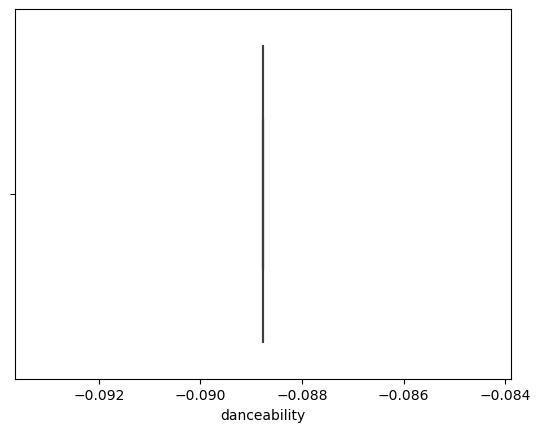

In [57]:
sns.boxplot(df.danceability)
plt.show()

In [30]:
from sklearn.ensemble import IsolationForest

In [31]:
model = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
model.fit(df[['danceability']])

C:\Users\AJINKYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03, random_state=42)

In [44]:
df['danceability'] = model.decision_function(df[['danceability']])
df['danceability']

C:\Users\AJINKYA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- danceability
Feature names seen at fit time, yet now missing:
- duration_ms

  warnings.warn(message, FutureWarning)


0        -0.088771
1        -0.088771
2        -0.088771
3        -0.088771
4        -0.088771
            ...   
113995   -0.088771
113996   -0.088771
113997   -0.088771
113998   -0.088771
113999   -0.088771
Name: danceability, Length: 114000, dtype: float64

In [45]:
df['anomaly'] = model.predict(df[['danceability']])
df['anomaly']

C:\Users\AJINKYA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- danceability
Feature names seen at fit time, yet now missing:
- duration_ms

  warnings.warn(message, FutureWarning)


0        -1
1        -1
2        -1
3        -1
4        -1
         ..
113995   -1
113996   -1
113997   -1
113998   -1
113999   -1
Name: anomaly, Length: 114000, dtype: int32

In [46]:
df['anomaly'] == -1

0         True
1         True
2         True
3         True
4         True
          ... 
113995    True
113996    True
113997    True
113998    True
113999    True
Name: anomaly, Length: 114000, dtype: bool

In [55]:
# Total Percentage of outliers detected
df = pd.DataFrame(df)
print("Percentage of anomalies in data: {:.2f}".format((len(df.loc[df['anomaly']== -1])/len(df))*100))

Percentage of anomalies in data: 100.00


In [61]:
total_outliers = len(df[df['danceability'] > 1.00])
total_outliers
print("Accuracy percentage: ",100*list(df['anomaly']).count(-1)/(total_outliers))

ZeroDivisionError: division by zero

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
rng = np.random.RandomState(0)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

NameError: name 'X' is not defined

In [58]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

NameError: name 'X_train' is not defined